# A/B Testing

In [1]:
import pandas as pd
import numpy as np

# Plotting 
import seaborn as sns
import matplotlib.pyplot as plt

# Stats stuff
import scipy.stats as stats

# Learning Goals

- Explain how A/B testing relates to hypothesis testing
- Describe the considerations in designing an A/B test
- Explain how to conduct an A/B test 

# Introduction to A/B Testing

> **A/B testing** is a general methodology when you want to test a new feature and/or product (especially for online products).

## What Is It Exactly?

Rolling out new features and products can be exciting but also nerve-wracking! An organization hopes that new features, updates, etc. are going to be useful to their customers/users but there's the possibility they weren't as great as they hoped.

A lot of times, we can make smaller, iterative improvements to a product before committing fully to making the change for all users or dedicating time committing to the new changes.

What we can do is give out these changes to a relatively small group in order to gain insights on how we might want to proceed in making changes. 

These changes can include changes to the user-interface (UI) of a website, new recommendation models, new features, etc.

![](images/mountains.png)

> A/B testing is best suited for informing us what improvements we can make on something we already have. It's not really meant to tell us what _new direction_ we should go.
>
> An analogy: A/B testing is meant to tell us how to climb up the mountain we're already on, but not necessarily _what_ mountain we should be on.

## How Does It Relate to What We've Learned?

At this point, you probably realized this is related to hypothesis testing! In fact, A/B testing is essentially **hypothesis testing** but applied to a business problem!

We typically will carry out _experiments_ by comparing different groups to some control group. The simplest case is comparing a group exposed to the new changes to a group where no changes were made. But you can also have _many_ different groups each with slight variations!

![](images/ab-testing.webp)
> Image source from [Optimizely](https://www.optimizely.com/optimization-glossary/ab-testing/)

When we have these groups, we can use an appropriate hypothesis test to determine if it is _significant_ enough to warrant making the change. 

![](images/huh.png)

And this is where your skills of a data scientist can shine. It's not just doing the technical stuff correctly (though it is important!), but also how you communicate your findings to stakeholders who likely have limited knowledge of statistics.

# Designing an Experiment

## Consider Whom You're Testing

It's important to consider _whom_ you're testing! You want to ensure that the participants in your experiment will be useful when drawing conclusions as the experiment concludes.

!["Who me?" gif happy to be chosen](images/who_me.gif)
> _User happy you chose them for your experiment_

But note sometimes when we do A/B testing we might take the attitude of _"well... close enough!"_ when thinking about targeting our test. This is because sometimes it's not feasible or worth the time to segment the population.

## Be Aware of Initial Launch

### Novelty Effect

> When users love the newest and latest but eventually the "newness" wears off

!["That Hansel's so hot right now" gif from Zoolander](images/hansel_is_hot.gif)

### Change Aversion

![Old man yells at cloud newspaper clipping from the Simpsons TV show](images/old_man_yells_at_cloud.jpg)

> Users are used to the the way things are and don't want to change!

![](https://imgs.xkcd.com/comics/workflow.png)
> [xkcd "Workflow"](https://xkcd.com/1172/)

### Avoiding These Issues?

* Wait for users to "die" and be replaced by new users
* Wait for old users to get used to it

In other words we need to take **time** for the users to adopt the changes. This is where a **[cohort analysis](https://en.wikipedia.org/wiki/Cohort_analysis)** can be very useful by keeping track of behavior of groups as the new features are introduced.

## Determining Size of Experiment

When talking about hypothesis tests, typically the larger the sample the better! Does the same apply for A/B testing?

Well in an A/B test, there's likely more to consider beyond getting a significant result. 

For example, if it takes a long time to collect data from an individual then it might be a better idea to limit the number of participants in an experiment.

It also might not be worth experimenting with many individuals since it might cost the business. For example, imagine if we test on a substantial number of participants but it turns out the users react _negatively_ to that change and they quit using the product completely! 

So we really want to ensure we determine the size of the experiment so we can still observe a significant difference without any negative effects!

### We Need More Power! ⚡️

We really need to figure out a sample size but still keep the integrity of our hypothesis test to identify a signal in our experiment.

We can probably think of the opposite based on what we learned; what things change as we increase/decrease our sample size?

You probably thought of confidence level (related to $\alpha$) but it turns out the sample size can also affect $\beta$ (related to the probability of a type 2 error) and something called **effect size**.

> **NOTE**
>
> $\beta$ is the probability of a type II error occurring and is generally set to $20\%$, similar to how $\alpha$ is the probability of a type I error occurring and generally set to $5\%$.
>
> Typically, we talk about **statistical power** which is simply $1-\beta$.

There's a great interactive tool showing how all of these ($\alpha$, $\beta$, effect size, and sample size) are all related: https://rpsychologist.com/d3/nhst/

![](images/power_relationship.png)

For A/B tests, we can specify what confidence/significance level we want ($\alpha$), the statistical power, and what effect we want to detect to determine the sample size. Sometimes we may need to limit the number of samples because of some constraint of the test and can sacrifice one of the other values like our confidence or effect size we hope to detect.

Finding one of the parameters by setting the other three is called a **power analysis**. This can sometimes be a complicated process because we have to consider what kind of statistical test we'll use.

# Example A/B Test

Let's try out an A/B test with some data!

## The Scenario

We've been hired on by a company looking to see if they can change out their UI to get more website visitors to create an account. 

Their innovative idea? Modify their sign-up button from pink to slightly more pink! 🤯

## What's Our Goal?

They've tasked us to figure out if it's worth them making the change. They say their developers really don't want to put in the effort unless we're confident it has an effect.

***What information do we need before designing our experiment?***

### Here's What We Asked & This Is What They Said:

There's plenty we can ask the company, but here's a few things we asked:

* _How much of an increase in sign-ups is "worth" the change?_
> The company says if they have an absolute increase in the conversion rate of **just $2\%$**, it'd be worth making the change for the whole site!

* _What's the time frame for this experiment?_
> The company says we really can afford running the experiment for **a month** since they need to make a decision soon so they can focus on the next UI updates. (*I hear they're thinking of making the button a circle next!!*)

* _How many users visit the site per day?_
> The company says they have about **$40,000$ unique visitors per day**.

* _As a baseline, about how many visitors actually end up signing-up?_
> Turns out it was easier to look this up ourselves, and we find there's an **$8\%$ chance** a visitor viewing the page will sign up.

## Design the Experiment 

Obviously we won't be designing the experiment before the data are collected but we should still consider what has to go into this.

***What would you consider before running the experiment?***

### What We Decided:

In [2]:
8 * .02

0.16

In [4]:
8 + 2

10

In [5]:
8 / 2

4.0

- If we want to see an increase of $2\%$ from $8\%$ and we choose a typical power $0.8$ and a conservative $\alpha=0.01$, we can do a power analysis to find the minimum number of samples needed is about $4,400$ samples.
- [Handy Calculator](https://www.evanmiller.org/ab-testing/sample-size.html). There are lots out there.
- Since we're running for just a month and we have about $40,000$ visitors per day, we probably can sample a decent number of visitors without changing a lot of visitors' UI.
- We'll have two groups: a control group that will have no change and an experiment group that will have the updated sign-up button.

Let's pretend we already collected about a month's worth of data for the control and experiment groups.

We have the data aggregated in separate files for the two groups. In the file, we have a new day on each line where we recorded the number of pageviews (for the visitors assigned to a group) and the number of conversions (sign-ups).

In [6]:
# Load the data
df_control = pd.read_csv('data/control.csv')
df_experiment = pd.read_csv('data/experiment.csv')

## Experiment Time! 🧪

In [7]:
df_control.head()

,views,conversions
0,7779,696
1,9150,790
2,10564,917
3,9923,847
4,10065,842


In [8]:
df_experiment.head()

,views,conversions
0,7801,719
1,9373,818
2,10564,917
3,9952,860
4,9879,865


In [9]:
df_control.shape, df_experiment.shape

((23, 2), (23, 2))

### Visualize Our Data

Let's look at the data and see if we can notice anything visually

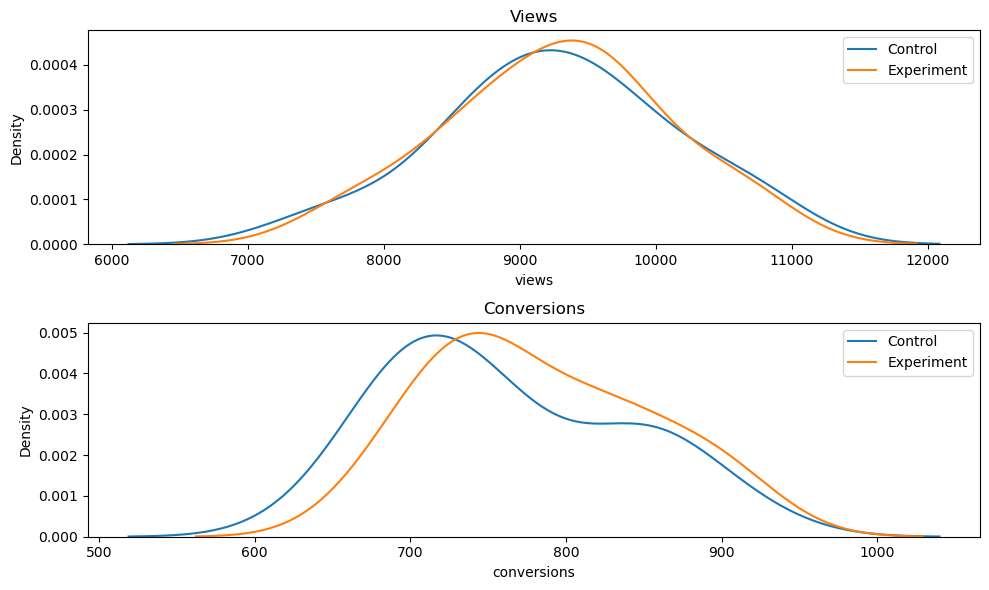

In [10]:
f, (ax0,ax1) = plt.subplots(nrows=2, figsize=(10,6))

# Views
ax0.set_title('Views')
sns.kdeplot(data=df_control.views, ax=ax0, label='Control')
sns.kdeplot(data=df_experiment.views, ax=ax0, label='Experiment')
ax0.legend()

# Conversions
ax1.set_title('Conversions')
sns.kdeplot(data=df_control.conversions, ax=ax1, label='Control')
sns.kdeplot(data=df_experiment.conversions, ax=ax1, label='Experiment')
ax1.legend()

plt.tight_layout()

### Perform Statistical Test

Since we are looking at the **frequency of conversions from views**, we can use the $\chi^2$ goodness-of-fit test.

So the first step is to get our data into a format of "observed" (obs) vs "expected" (exp)

In [11]:
# We'll just sum all the days together to see an overall change
exp_views = df_control['views'].sum()
exp_conv = df_control['conversions'].sum()

obs_views = df_experiment['views'].sum()
obs_conv = df_experiment['conversions'].sum()

In [12]:
# This should be "converted" and "not converted"
observations = np.array([obs_conv, obs_views - obs_conv])

expectations = np.array([exp_conv, exp_views - exp_conv])

print('OBSERVED (expermiment):', observations)
print('EXPECTED (control):', expectations)

OBSERVED (expermiment): [ 18019 195308]
EXPECTED (control): [ 17531 195796]


In [13]:
exp_conv / exp_views * 100

8.21790021891275

In [14]:
obs_conv / obs_views * 100

8.446657010129988

### Where else could we have gotten expected values from?

- Could have used the known ('expected') conversion rate of 8%

In [15]:
# Run the test
stats.chisquare(f_obs=observations, f_exp=expectations)

Power_divergenceResult(statistic=14.800451531929001, pvalue=0.00011950688401778667)

Is it statistically significant?  YES!

Would it be worth making the change based on the observed effect?

In [16]:
experiment_percent = obs_conv/obs_views*100
print(f'Percent Experiment Converted: {experiment_percent:.5}%')
control_percent = exp_conv/exp_views*100
print(f'Percent Control Converted: {control_percent:.5}%')

print(f'Difference between experiment & control {experiment_percent-control_percent:.3}%')

Percent Experiment Converted: 8.4467%
Percent Control Converted: 8.2179%
Difference between experiment & control 0.229%


## Conclusion?

We got a significant result with $99\%$ confidence! But we're certain the effect isn't large enough for the company to make the change (at least based on what they told us).

We might break the news like this:

> _We're very confident that there was an observable effect in conversions by changing the button's color. However, the observed effect was smaller than what was stated to make the change site-wide valuable._ 
>
> _The difference in button color was observed to increase sign-ups by an absolute amount of about $0.2\%$. Perhaps this change can still be made valuable since we are confident that the effect was real._

# Level Up: Fisher's Test

Another option for a hypothesis test for this example is [Fisher's exact test](https://en.wikipedia.org/wiki/Fisher%27s_exact_test). This is typically used for _small_ frequencies but has some advantages over the $\chi^2$ test.

Fisher's Test tells us that the $p$-value corresponding to our distribution is given by:

$$\Large p = \frac{(a+b)!(c+d)!(a+c)!(b+d)!}{a!b!c!d!n!}$$

These values $a$, $b$, $c$, and $d$ are given by the frequencies of a $2\times2$ contingency table, namely:

|                     |Category 1, choice #1|Category 1, choice #2|
|---------------------|---------------------|---------------------|
|Category 2, choice #1|          $a$        |          $b$        |
|Category 2, choice #2|          $c$        |          $d$        |

At this point, you likely can see how this can be used for the above example.

In [18]:
import math

In [19]:
math.factorial(18019)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

In [20]:
# We'll use our observations (experiment group) & expecations (control group) as
# defined earlier in the lecture
table = np.array([observations, expectations])
table

array([[ 18019, 195308],
       [ 17531, 195796]])

Using SciPy's function:

In [22]:
# Note the slowness of the method (due to large factorials)
help(stats.fisher_exact)

Help on function fisher_exact in module scipy.stats._stats_py:

fisher_exact(table, alternative='two-sided')
    Perform a Fisher exact test on a 2x2 contingency table.

    The null hypothesis is that the true odds ratio of the populations
    underlying the observations is one, and the observations were sampled
    from these populations under a condition: the marginals of the
    resulting table must equal those of the observed table. The statistic
    returned is the unconditional maximum likelihood estimate of the odds
    ratio, and the p-value is the probability under the null hypothesis of
    obtaining a table at least as extreme as the one that was actually
    observed. There are other possible choices of statistic and two-sided
    p-value definition associated with Fisher's exact test; please see the
    Notes for more information.

    Parameters
    ----------
    table : array_like of ints
        A 2x2 contingency table.  Elements must be non-negative integers.
    alt

In [23]:
stats.fisher_exact(table)

SignificanceResult(statistic=1.0304045741806214, pvalue=0.006980383509687363)

We still find a significant result at our significance level.